# Algorithms. Course project.

#### Advanced sorting: variant 5, algorithms on graphs: variant 2
#### Group 2: Andrii Tykhonov, Mykola Pavlov, Kateryna Aloshkina

## Introduction

One of the challenges we face while processing data is solving a computational problem to get a practical value from the data or to create a serviceable product. So we use algorithms and data structures to solve problems and organize the data in a most possible efficient way. Especially when dealing with big data we have to be thorough in choosing and implementing an appropriate algorithm. Thus we need to be fluent in almost all the algorithms and data structures given in a course, from elementary (linked lists, stacks, queues, bags, BFS, DFS, insertion sort alg., recursion...) to advanced (red-black trees, hashing, shell sort, quick sort, heap sort, Bellman-Ford alg., Dijkstra's alg., Kosaraju's alg. etc).

Our Coursework is dedicated to two particular problems, solving sorting and graphs. In the sorting part we implemented two algorithms. They are Natural 2-Way Merge Sort and Straight 2-Way Merge Sort. To work out their efficiency we:
1. Implemented the algorithms;
2. Compared a theoretical and practical number of operations for a certain number of values;
3. Generated two random arrays with integers and strings;
4. Applied our two algorithms to the generated arrays.

In the second part realted to graphs we implemented four algorithms. Two of them are computing Graph Strongly Connected Components (SCC). We find how many parts of a given graph have such a characteristics that every vertex is reachable from any other vertex of that part. So if to imagine a situation that the police department of a city has made all streets one-way then what you can find out applying SCC algorithms is in what parts of a city it is still possible to drive legally from any intersection to any other intersection. To solve the general problem we solved some particular tasks first:
1. Implemented Kosaraju's and Tarjan's SCC algorithms;
2. We ran both algorithm implementations on the input data set for the first i rows of the input file. Experimented with i = 1 ... n using an appropriate increment to obtain 20-30 performance measurement points. Measured and compared performance of our implementations.

Two other algorithms computing a Topological Ordering:
1. Implemented Kahn's and Depth-first Search algorithms for Topological Sorting;
2. Ran both algorithm implementations on the input data set for the input data set of dimension k (n = k). Experimented with k = 1 ... 10 000 using an appropriate increment to obtain 20-30 performance measurement points. Measured and compared performance of our implementations.

Members of our team accomplished such individual tasks:
- Andrii Tykhonov – completed the sorting part;
- Mykola Pavlov – completed the graphs part;
- Kateryna Aloshkina – tested the algorithms, wrote a report.

## Sorting problem 5. Natural 2-Way Merge Sort and Straight 2-Way Merge Sort

### Natural 2-Way Merge Sort

Records *K*<sub>1</sub>,...,*K*<sub>N</sub> are sorted using two areas of memory, each of which is capable of holding *N* records. For convenience, we shall say that the records of the second area are *K*<sub>N+1</sub>,...,*K*<sub>2N</sub>, although it is not really necessary that *K*<sub>N+1</sub> be adjacent to *K*<sub>N</sub>. The initial contents of *K*<sub>N+1</sub>,...,*K*<sub>2N</sub> are immaterial. After sorting is complete, the keys will be in order, *K*<sub>1</sub> ≤ ... ≤ *K*<sub>N</sub>.

A time complexity of this algorith is N log(N)

#### Algorithm description [1]

N1. [Initialize.] Set *s* ⇽ 0. (When *s* = 0, we will be transferring records from the (*K*<sub>1</sub>,...,*K*<sub>N</sub>) area to the (*K*<sub>N+1</sub>,...,*K*<sub>2N</sub>) area; when *s* = 1, we will be going the other way.)

N2. [Prepare for pass.] If *s* = 0, set *i* ⇽ 1, *j* ⇽ *N*, *k* ⇽ *N* + 1, *l* ⇽ 2*N*; if *s* = 1, set *i* ⇽ *N* + 1, *j* ⇽ 2*N*, *k* ⇽ 1, *l* ⇽ *N*. (Variables *i*, *j*, *k*, *l* point to the current positions in the "source files" being read and the "destination files" being written.) Set *d* ⇽ 1, *f* ⇽ 1. (Variables *d* gives the current direction of output; *f* is set to zero if future passes are necessary.)

N3. [Compare *K*<sub>i</sub>: *K*<sub>j</sub>] If *K*<sub>i</sub> > *K*<sub>j</sub>, go to step N8. If *i* = *j*, set *K*<sub>k</sub> ⇽ *K*<sub>i</sub> and go to N13.

N4. [Transmit *K*<sub>i</sub>.] Set *K*<sub>k</sub> ⇽ *K*<sub>i</sub>, k ⇽ k + d.

N5. [Stepdown?] Increase *i* by 1. Then if *K*<sub>i-1</sub> ≤ *K*<sub>i</sub>, go back to step N3.

N6. [Transmit *K*<sub>j</sub>.] Set *R*<sub>k</sub> ⇽ *R*<sub>j</sub>, k ⇽ k + d.

N7. [Stepdown?] Decrease *j* by 1. Then if *K*<sub>j+1</sub> ≤ *K*<sub>j</sub>, go back to step N6; otherwise go to step N12.

N8. [Transmit *K*<sub>j</sub>.] Set *K*<sub>k</sub> ⇽ *K*<sub>j</sub>, k ⇽ k + d.

N9. [Stepdown?] Decrease *j* by 1. Then if *K*<sub>j+1</sub> ≤ *K*<sub>j</sub>, go back to step N3.

N10. [Transmit *K*<sub>i</sub>.] Set *K*<sub>k</sub> ⇽ *K*<sub>i</sub>, k ⇽ k + d.

N11. [Stepdown?] Increase *i* by 1. Then if *K*<sub>i-1</sub> ≤ *K*<sub>i</sub>, go back to step N10.

N12. [Switch sides.] Set *f* ⇽ 0, *d* ⇽ -*d*, and interchange *k* ⇿ *l*. Return to step N3.

N13. [Switch areas.] If *f* = 0, set *s* ⇽ 1 - *s* and return to N2. Otherwise sorting is complete; if *s* = 0, set (*K*<sub>1</sub>,...,*K*<sub>N</sub>) ⇽ (*K*<sub>N+1</sub>,...,*K*<sub>2N</sub>).

#### Implementation

In [463]:
%matplotlib inline

from copy import copy
import math
import string


def natural(K, N, op={}):
    """
    Natural Two-way Merge Sort.
    """
    # N1. [Initialize.]
    s = 0
    i = -1
    j = -1
    k = -1
    l = -1
    d = 0
    f = 0
    complete = False
    op.ovr(8)

    while True:
        if complete:
            break
        # N2. [Prepare for pass.]
        op.ovr()
        if s == 0:
            i = 1
            j = N
            k = N + 1
            l = 2 * N
        elif s == 1:
            op.ovr()
            i = N + 1
            j = 2 * N
            k = 1
            l = N
        d = 1
        f = 1
        op.ovr(6)
        while True:
            # N3. [Compare Ki: Kj]
            op.cmp()
            if K[i] > K[j]:
                # N8. [Transmit Kj.]
                K[k] = K[j]
                op.mv()
                k += d
                op.ovr()
                j -= 1
                op.ovr()
                # N9. [Stepdown?]
                op.cmp()
                if K[j+1] <= K[j]:
                    continue
                else:
                    while True:
                        # N10. [Transmit Ki.]
                        K[k] = K[i]
                        op.mv()
                        k += d
                        # N11. [Stepdown?]
                        i += 1
                        op.ovr(2)
                        op.cmp()
                        if K[i-1] > K[i]:
                            break
                    # N12. [Switch sides.]
                    f = 0
                    d = -d
                    k, l = l, k
                    op.ovr(3)
                    continue
            elif i != j and K[i] <= K[j]:
                op.ovr()
                op.cmp()
                # N4. [Transmit Ki.]
                K[k] = K[i]
                op.mv()
                k += d
                op.ovr()
                # N5. [Stepdown?]
                i += 1
                op.ovr()
                op.cmp()
                if K[i-1] <= K[i]:
                    continue
                else:
                    while True:
                        # N6. [Transmit Kj.]
                        K[k] = K[j]
                        op.mv()
                        k += d
                        # N7. [Stepdown?]
                        j -= 1
                        op.ovr(2)
                        op.cmp()
                        if K[j+1] > K[j]:
                            break
                    # N12. [Switch sides.]
                    f = 0
                    d = -d
                    k, l = l, k
                    op.ovr(3)
                    continue
            elif i == j:
                op.ovr()
                K[k] = K[i]
                op.mv()
                op.ovr()
                # N13. [Switch areas.]
                if f == 0:
                    op.ovr()
                    s = 1 - s
                    break
                else:
                    complete = True
                    op.ovr()
                    break
        op.ovr()
        if complete:
            break

    op.ovr()
    if s == 0:
        for m in range(1, N+1):
            K[m] = K[N+m]
            op.mv()

    return K

## Straight 2-Way Merge Sort implementaion

The boundary lines between runs are determined in Natural Two-Way Merge Sort entirely by stepdowns. This has the possible advantage that input files with a preponderance of increasing order can be handled very quickly, and so can input files with a preponderance of decreasing order; but it slows down the main loop of the calculation. Instead of testing stepdowns, we can determine the length of runs artificially, by saying that all runs in the input have length 1, all runs after the first pass (except possibly the last run) have length 2,..., all runs after *k* passes (except possibly the last run) have length 2<sup>k</sup>. This is called a *straight* two-merge, as opposed to the "natural" merge.

A time complexity of this algorith is N log(N)

#### Algorithm description

S1. [Initialize.] Set *s* ⇽ 0, *p* ⇽ 1. (When *s* = 0, we will be transferring records from the (*K*<sub>1</sub>,...,*K*<sub>N</sub>) area to the (*K*<sub>N+1</sub>,...,*K*<sub>2N</sub>) area; when *s* = 1, we will be going the other way. *p* represents the size of ascending runs to be merged on the current pass; further variables *q* and *r* will keep track of the number of unmerged items in a run.)

S2. [Prepare for pass.] If *s* = 0, set *i* ⇽ 1, j ⇽ N, k ⇽ N, l ⇽ 2*N* + 1; if *s* = 1, set *i* ⇽ *N* + 1, *j* ⇽ 2*N*, *k* ⇽ 0, l ⇽ *N* + 1. Then set *d* ⇽ 1, q ⇽ p, r ⇽ p.

S3. [Compare *K*<sub>i</sub>: *K*<sub>j</sub>.] If *K*<sub>i</sub> > *K*<sub>j</sub>, go to step S8.

S4. [Transmit *K*<sub>i</sub>.] Set k ⇽ k + d, *K*<sub>k</sub> ⇽ *K*<sub>i</sub>.

S5. [End of run?] Set *i* ⇽ *i* + 1, *q* ⇽ *q* - 1. If *q* > 0, go back to step S3.

S6. [Transmit *K*<sub>j</sub>.] Set *k* ⇽ *k* + *d*. Then if *k* = *l*, go to step S13; otherwise set *K*<sub>k</sub> ⇽ *K*<sub>j</sub>.

S7. [End of run?] Set *j* ⇽ *j* - 1, *r* ⇽ *r* - 1. If *r* > 0, go back to step S6; otherwise go to S12.

S8. [Trasmit *K*<sub>j</sub>.] Set *k* ⇽ *k* + d, *K*<sub>k</sub> ⇽ *K*<sub>j</sub>.

S9. [End of run?] Set *j* ⇽ *j* - 1, *r* ⇽ *r* - 1. If *r* > 0, go back to step S3.

S10. [Transmit *K*<sub>i</sub>.] Set *k* ⇽ *k* + d. Then if *k* = *l*, go to step S13; otherwise set *K*<sub>k</sub> ⇽ *K*<sub>i</sub>.

S11. [End of run?] Set *i* ⇽ *i* + 1, *q* ⇽ *q* - 1. If *q* > 0, go back to step S10.

S12. [Switch sides.] Set *q* ⇽ *p*, *r* ⇽ *p*, *d* ⇽ -*d*, and interchange k ⇿ l. If *j* - *i* < *p*, return to step S10; otherwise return to S3.

S13. [Switch areas.] Set *p* ⇽ *p* + *p*. If *p* < *N*, set *s* ⇽ 1 - *s* and return to S2. Otherwise sorting is complete; if *s* = 0, set (*K*<sub>1</sub>,...,*K*<sub>N</sub>) ⇽ (*K*<sub>N+1</sub>,...,*K*<sub>2N</sub>).

The former tests for stepdowns have been replaced by decrementing *q* or *r* and testing the result for zero; this reduces the asymptotic MIX running time to 11*N*lg*N* units, slightly faster than we were able to achive with Natural Two-Way Merge Sort.

#### Implementation

In [465]:
def straight(K, N, op):
    """
    Straight Two-Way Merge Sort.
    """
    # S1. [Initialize.]
    s = 0
    p = 1
    i = -1
    j = -1
    k = -1
    l = -1
    d = 0
    q = 0
    r = 0
    goto_s3 = False
    goto_s13 = False
    op.ovr(9)

    while True:
        # S2. [Prepare for pass.]
        op.ovr()
        if s == 0:
            i = 1
            j = N
            k = N
            l = 2 * N + 1
        elif s == 1:
            op.ovr()
            i = N + 1
            j = 2 * N
            k = 0
            l = N + 1
        d = 1
        q = p
        r = p
        op.ovr(7)
        while True:
            goto_s3 = False
            # S3. [Compare Ki: Kj.]
            op.cmp()
            if K[i] > K[j]:
                # S8. [Trasmit Kj.]
                k += d
                op.ovr()
                K[k] = K[j]
                op.mv()
                # S9. [End of run?]
                j -= 1
                r -= 1
                op.ovr(2)
                op.ovr()
                if r > 0:
                    continue
                else:
                    while True:
                        while True:
                            # S10. [Transmit Ki.]
                            k += d
                            op.ovr()
                            op.ovr()
                            if k == l:
                                goto_s13 = True
                                break
                            else:
                                op.mv()
                                K[k] = K[i]
                            # S11. [End of run?]
                            i += 1
                            q -= 1
                            op.ovr(2)
                            op.ovr()
                            if q <= 0:
                                break
                        if goto_s13:
                            break
                        # S12. [Switch sides.]
                        q = p
                        r = p
                        d = -d
                        k, l = l, k
                        op.ovr(4)
                        op.ovr()
                        if j - i >= p:
                            goto_s3 = True
                        if goto_s3:
                            break
                    if goto_s3:
                        continue
                    if goto_s13:
                        break
            else:
                # S4. [Transmit Ki.]
                k += d
                op.ovr()
                K[k] = K[i]
                op.mv()
                # S5. [End of run?]
                i += 1
                q -= 1
                op.ovr(2)
                op.ovr(1)
                if q > 0:
                    # Go to S3.
                    continue
                else:
                    while True:
                        while True:
                            # S6. [Transmit Kj.]
                            k += d
                            op.ovr()
                            op.ovr()
                            if k == l:
                                goto_s13 = True
                                break
                            else:
                                K[k] = K[j]
                                op.mv()
                            # S7. [End of run?]
                            j -= 1
                            r -= 1
                            op.ovr(2)
                            op.ovr()
                            if r <= 0:
                                break
                        if goto_s13:
                            break
                        # S12. [Switch sides.]
                        q = p
                        r = p
                        d = -d
                        k, l = l, k
                        op.ovr(6)
                        op.ovr()
                        if j - i >= p:
                            goto_s3 = True
                        if goto_s3:
                            break
                    if goto_s3:
                        continue
                    if goto_s13:
                        break
        # S13. [Switch areas.]
        goto_s13 = False
        p = p + p
        op.ovr()
        op.ovr()
        if p < N:
            s = 1 - s
            op.ovr()
        else:
            break

    op.ovr()
    if s == 0:
        for m in range(1, N+1):
            K[m] = K[N+m]
            op.mv()

    return K

## Experiments

#### Utility functions for data generation.

In [466]:
import random

def str_generator(size=6, chars=string.ascii_lowercase + string.digits):
    """
    Generate random string of size `size`.
    """
    return ''.join(random.choice(chars) for _ in range(size))

def gen(n=10000, data_type='integer'):
    """
    Generate `n` random records of the given type `data_type`. 
    The `data_type` could be equal to `integer` or `string`.
    """
    random_values = []
    random_data_len = n * 100
    
    for _ in range(random_data_len):
        if data_type == 'string':
            size = random.choice(xrange(6, 20))
            random_values.append(str_generator(size=size))
        elif data_type == 'integer':
            random_values.append(random.choice(xrange(1, random_data_len)))
        else:
            raise Exception('Unknown data type.')

    result = {}
    key = 1
    for v in random.sample(random_values, n):
        result[key] = v
        key += 1

    return result

#### Utility functions for counting the operations and performance testing

In [473]:
from pandas import DataFrame
from time import time

class Operation(object):
    """
    Utility class for an operation counting.
    """
    def __init__(self):
        self.comp = 0
        self.move = 0
        self.overhead = 0

    def cmp(self):
        self.comp += 1

    def mv(self):
        self.move += 1

    def ovr(self, c=1):
        self.overhead += c

    def total(self):
        return self.comp + self.move + self.overhead

columns = ['N', 'Time', 'Comparisons', 'Exchanges', 'Overhead', 'Total Ops', 'ACE', 'SF']

def test(sort_func, data_type='integer'):
    """
    Method for the performance testing of the given function `sort_func`.
    If `data_type` equals to `integer` the tests are performed using random integer values.
    If `data_type` equals to `string` the tests are performed using random string values.
    """
    NN = 4
    result = []

    for n in range(300, 10500, 300):
        t = 0
        data = gen(n=n, data_type=data_type)
        ops = Operation()

        for _ in range(NN):
            t1 = time()
            sorted_data = sort_func(copy(data), n, ops)
            t2 = time()
            t += (t2 - t1) * 1000

        t = t / NN
        comp = ops.comp / NN
        move = ops.move / NN
        overhead = ops.overhead / NN
        total = ops.total() / NN
        ace = n * math.log(n) / math.log(2)
        sf = ace / total
    
        result.append([n, t, comp, move, overhead, total, ace, sf])
      
    return DataFrame(result, columns=columns)

### Run Natural Two-Way Merge Sort algorithm experiments

In [474]:
natural_int_df = test(natural, 'integer')
natural_int_df

,N,Time,Comparisons,Exchanges,Overhead,Total Ops,ACE,SF
0,300,5.006790,5809,2400,6571,14780,2468.645607,0.167026
1,600,10.667026,13115,6000,14571,33686,5537.291214,0.164380
2,900,17.293990,19403,9000,21538,49941,8832.403072,0.176857
3,1200,24.781942,29299,12000,32073,73372,12274.582429,0.167292
4,1500,38.580537,36373,15000,39795,91168,15826.120178,0.173593
5,1800,35.683334,43444,18000,47524,108968,19464.806144,0.178629
6,2100,46.262681,56491,25200,61237,142928,23175.964586,0.162151
7,2400,54.346561,64694,28800,70180,163674,26949.164857,0.164651
8,2700,62.399983,72591,32400,78734,183725,30776.607968,0.167515
9,3000,72.197556,80347,36000,87188,203535,34652.240356,0.170252


In [475]:
natural_str_df = test(natural, 'string')
natural_str_df

,N,Time,Comparisons,Exchanges,Overhead,Total Ops,ACE,SF
0,300,4.708290,5815,2400,6565,14780,2468.645607,0.167026
1,600,11.706412,13145,6000,14573,33718,5537.291214,0.164224
2,900,17.218530,19423,9000,21566,49989,8832.403072,0.176687
3,1200,25.520146,29351,12000,32162,73513,12274.582429,0.166972
4,1500,29.979467,36403,15000,39882,91285,15826.120178,0.173370
5,1800,39.234757,43415,18000,47532,108947,19464.806144,0.178663
6,2100,49.956083,56437,25200,61265,142902,23175.964586,0.162181
7,2400,81.075728,64656,28800,70214,163670,26949.164857,0.164655
8,2700,61.570287,72571,32400,78698,183669,30776.607968,0.167566
9,3000,69.188893,80325,36000,87169,203494,34652.240356,0.170286


#### Visualize the performance measurements

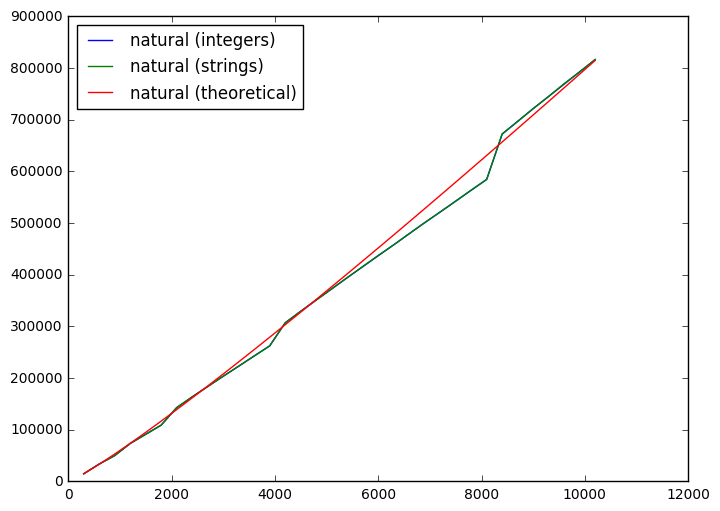

In [476]:
import matplotlib
import matplotlib.pyplot as plt

theoretical = [6 * i * math.log(i) / math.log(2) for i in range(300, 10500, 300)]

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(natural_int_df[columns[0]], natural_int_df[columns[5]], label='natural (integers)')
plt.plot(natural_str_df[columns[0]], natural_str_df[columns[5]], label='natural (strings)')
plt.plot(natural_str_df[columns[0]], theoretical, label='natural (theoretical)')
plt.legend(loc='upper left')
plt.show()

### Run Straight Two-Way Merge Sort algorithm experiments

In [481]:
straight_int_df = test(straight, 'integer')
straight_int_df

,N,Time,Comparisons,Exchanges,Overhead,Total Ops,ACE,SF
0,300,6.578207,2224,3000,13197,18421,2468.645607,0.134013
1,600,10.664761,5026,6000,28679,39705,5537.291214,0.139461
2,900,15.985191,7828,9000,42643,59471,8832.403072,0.148516
3,1200,23.796976,11275,14400,62081,87756,12274.582429,0.139872
4,1500,32.947063,14119,18000,77454,109573,15826.120178,0.144434
5,1800,36.258757,17482,21600,92462,131544,19464.806144,0.147972
6,2100,43.551922,22352,25200,116326,163878,23175.964586,0.141422
7,2400,48.918366,24917,28800,133665,187382,26949.164857,0.143819
8,2700,83.530486,28205,32400,150144,210749,30776.607968,0.146034
9,3000,65.741301,30247,36000,167840,234087,34652.240356,0.148031


In [482]:
straight_str_df = test(straight, 'string')
straight_str_df

,N,Time,Comparisons,Exchanges,Overhead,Total Ops,ACE,SF
0,300,5.545974,2228,3000,13197,18425,2468.645607,0.133983
1,600,11.125982,5050,6000,28657,39707,5537.291214,0.139454
2,900,16.336441,7858,9000,42707,59565,8832.403072,0.148282
3,1200,24.122775,11301,14400,62063,87764,12274.582429,0.139859
4,1500,29.718637,14085,18000,77572,109657,15826.120178,0.144324
5,1800,37.279785,17492,21600,92400,131492,19464.806144,0.148030
6,2100,45.767784,22284,25200,116564,164048,23175.964586,0.141276
7,2400,73.379457,24941,28800,133545,187286,26949.164857,0.143893
8,2700,66.940248,28143,32400,150188,210731,30776.607968,0.146047
9,3000,73.905289,31213,36000,166876,234089,34652.240356,0.148030


#### Visualize the performance measurements

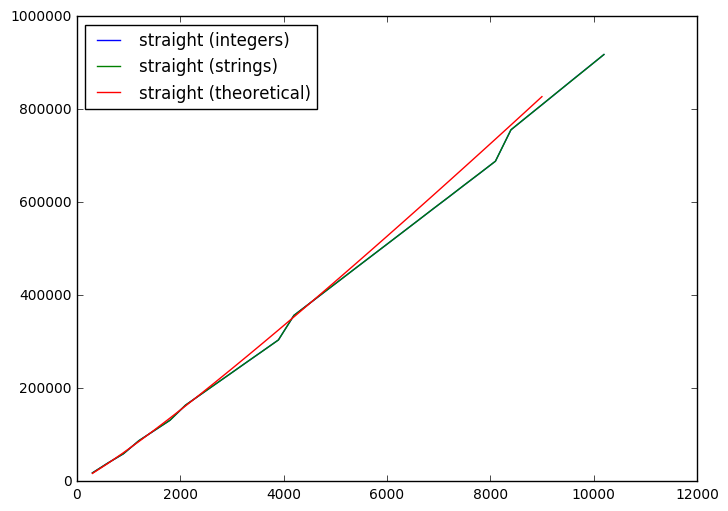

In [492]:
theoretical = [7 * i * math.log(i) / math.log(2) for i in range(300, 9300, 300)]

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(straight_int_df[columns[0]], straight_int_df[columns[5]], label='straight (integers)')
plt.plot(straight_str_df[columns[0]], straight_str_df[columns[5]], label='straight (strings)')
plt.plot(range(300, 9300, 300), theoretical, label='straight (theoretical)')
plt.legend(loc='upper left')
plt.show()

###  Comparing the performance of Natural Two-Way Merge Sort and Straight Two-Way Merge Sort

#### Comparative diagram for integers

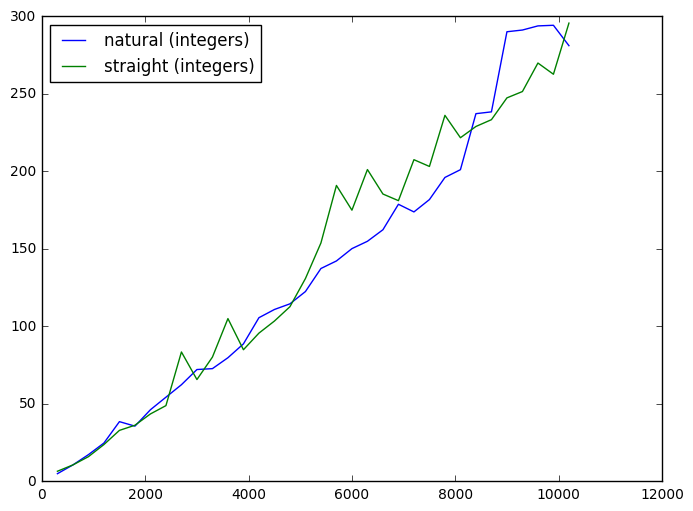

In [493]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(natural_int_df[columns[0]], natural_int_df[columns[1]], label='natural (integers)')
plt.plot(straight_int_df[columns[0]], straight_int_df[columns[1]], label='straight (integers)')
plt.legend(loc='upper left')
plt.show()

#### Comparative diagram for strings

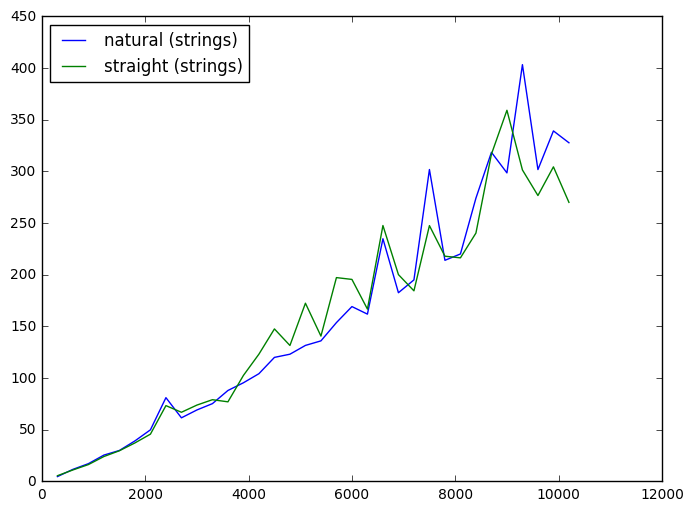

In [494]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(natural_str_df[columns[0]], natural_str_df[columns[1]], label='natural (strings)')
plt.plot(straight_str_df[columns[0]], straight_str_df[columns[1]], label='straight (strings)')
plt.legend(loc='upper left')
plt.show()

## Graphs. Problem 2. Computing Graph Strongly Connected Components


### Adjacency list data structure to store a graph

In this work we choosed adjacency list representation for a graph. It associates each vertex in the graph with the collection of its neighboring vertices or edges. 

This specific implementation was suggested by Guido van Rossum. It uses a hash table to associate each vertex in a graph with an array of adjacent vertices. In this representation, a vertex may be represented by any hashable object. There is no explicit representation of edges as objects.[2]

The main alternative to the adjacency list is the adjacency matrix, a matrix whose rows and columns are indexed by vertices and whose cells contain a Boolean value that indicates whether an edge is present between the vertices corresponding to the row and column of the cell. However, adjacency list is significantly more space-efficient than an adjacency matrix (stored as an array): the space usage of the adjacency list is proportional to the number of edges and vertices in the graph, while for an adjacency matrix stored in this way the space is proportional to the square of the number of vertices.

In [509]:
from collections import defaultdict

def no_such_vertex():
    raise ValueError("Vertex does not exist in graph")

class Graph:
    # Initialization of graph with the list of vertices and edges
    def __init__(self, vertices=[], edges=[]):
        self.adj_list = defaultdict(no_such_vertex)
        if len(vertices) > 0:
            self.adj_list.update({v:[] for v in vertices})
        if len(edges) > 0:
            for edge in edges:
                self.add_edge(edge[0], edge[1])
            
    def vertices(self):
        return self.adj_list.keys()
    
    def edges(self):
        edges = []
        for v in self.vertices():
            for u in self.neighbors(v):
                edges.append((v, u))
        return edges

    def neighbors(self, vertex):
        return self.adj_list[vertex][:]
        
    def adjacent(self, outbound, inbound):
        return inbound in self.adj_list[outbound] 
        
    def add_vertex(self, vertex):
        if vertex not in self.vertices():
            self.adj_list[vertex] = []
    
    def add_edge(self, outbound, inbound):
        if not self.adjacent(outbound, inbound):
            self.adj_list[outbound].append(inbound)
            
    def remove_edge(self, outbound, inbound):
        if self.adjacent(outbound, inbound):
            self.adj_list[outbound].remove(inbound)
    
    def vertex_num(self):
        return len(self.vertices())
    
    def edge_num(self):
        return sum(len(v) for v in self.adj_list.values())
    
    def reverse(self):
        reversed_graph = Graph(self.vertices())
        for v in self.vertices():
            for u in self.neighbors(v):
                reversed_graph.add_edge(u, v)
        return reversed_graph
    
# Perfomance counters
class Counters:
    def __init__(self):
        self.comparisons = 0
        self.exchanges = 0
        self.overhead = 0
        self.time = 0
    
    def total_ops(self):
        return self.comparisons + self.exchanges + self.overhead

### Kosaraju's algorithm for computing SCC

The algorithm can be understood as identifying the strong component of a vertex v as the set of vertices which are reachable from v both by backwards and forwards traversal. 

Kosaraju's algorithm uses two passes of depth first search. The first, in the original graph, is used to choose the order in which the outer loop of the second depth first search tests vertices for having been visited already and recursively explores them if not. The second depth first search is on the reversed graph of the original graph, and each recursive exploration finds a single new strongly connected component.[3]

Time complexity of this algorithm is O(|V| + |E|), where V - set of vertices, E - set of edges.

In [498]:
# Depth First Search for the forward graph
def visit(graph, vertex, visited, stack, counters=None):
    visited.add(vertex)
    counters.overhead += 1

    # Recursively visit all neighbors
    counters.overhead += 1
    for neighbor in graph.neighbors(vertex):
        counters.comparisons += 1
        if neighbor not in visited:
            visit(graph, neighbor, visited, stack, counters)
        counters.overhead += 1
    
    # Record visit
    stack.append(vertex)
    counters.overhead += 1
        
def kosaraju_SCC(graph, counters=None):
    visited = set()   # Track all visited vertices
    visit_order = []  # Store visit order in a stack
    scc = []          # Strongly connected components 
            
    # For each vertex of the graph do visit(vertex), 
    # where visit(vertex) is a Depth First Search
    counters.overhead += 1
    for vertex in graph.vertices():
        counters.comparisons += 1
        if vertex not in visited:
            visit(graph, vertex, visited, visit_order, counters)
        counters.overhead += 1
    
    # Reverse the graph
    reversed_graph = graph.reverse()  
    visited.clear()
    counters.overhead += 2
    
    # For each vertex of visit_order, do visit(vertex),
    # where visit(vertex) is a Depth First Search
    counters.overhead += 1
    while len(visit_order) != 0:
        vertex = visit_order.pop()
        counters.overhead += 1
        counters.comparisons += 1
        if vertex not in visited:
            component = []
            visit(reversed_graph, vertex, visited, component, counters)
            size = len(component)
            scc.append((size, component))
            counters.overhead += 2
            
        counters.overhead += 1
    
    return scc

### Tarjan's algorithm for computing SCC

Tarjan's strongly connected components algorithm, performs a single pass of depth first search. It maintains a stack of vertices that have been explored by the search but not yet assigned to a component, and calculates "low links" of each vertex (an index number of the highest ancestor reachable in one step from a descendant of the vertex) which it uses to determine when a set of vertices should be popped off the stack into a new component.

Time complexity of this algorithm is again O(|V| + |E|)

In [508]:
def tarjan_SCC(graph, counters=None):
    visit_order = dict()
    lowlink = dict()
    stack = []
    index = {'counter': 1}
    scc = []
    
    def strong_connect(vertex, visit_order, lowlink, index, stack, counters=None):
        # Set the depth index for vertex to the smallest unused index
        visit_order[vertex] = index['counter']
        lowlink[vertex] = index['counter']
        index['counter'] += 1
        stack.append(vertex)
        counters.overhead += 4
        
        # Consider neighbors of vertex
        counters.overhead += 1
        for neighbor in graph.neighbors(vertex):
            counters.comparisons += 1
            if neighbor not in visit_order.keys():
                # Neighbor has not yet been visited
                strong_connect(neighbor, visit_order, lowlink, index, stack, counters)
                lowlink[vertex] = min(lowlink[vertex], lowlink[neighbor])
                counters.exchanges += 1
                counters.comparisons +=1
                counters.overhead += 1
            elif neighbor in stack:
                # Neighbor is in stack and hence in the current SCC
                lowlink[vertex] = min(lowlink[vertex], visit_order[neighbor])
                counters.exchanges += 1
                counters.comparisons +=1
                counters.overhead += 1
            
            counters.overhead += 1
        
        # If vertex is a root node, pop the stack and generate an SCC
        counters.comparisons += 1
        if lowlink[vertex] == visit_order[vertex]:
            component = [vertex]
            neighbor = stack.pop()
            counters.overhead += 2
            
            counters.overhead += 1
            while neighbor != vertex:
                component.append(neighbor)
                neighbor = stack.pop()
                counters.overhead += 3
            
            size = len(component)
            scc.append((size, component))
            counters.overhead += 2
    
    counters.overhead += 1
    for vertex in graph.vertices():
        counters.comparisons += 1
        if vertex not in visit_order.keys():
            strong_connect(vertex, visit_order, lowlink, index, stack, counters)
        
        counters.overhead += 1
            
    return scc

#### Get top5 connected components by size

In [500]:
def top5_size(cc):
    # Output the number of connected components and the sizes of the 5 largest
    # CCs in the given graph, decreasing by size.
    top5_size = []
    N = len(cc)
    
    for _ in range(5):
        if len(cc) != 0:
            max_component = max(cc)
            top5_size.append(max_component[0])
            cc.remove(max_component)
    
    return (N, top5_size)

### Experiments

#### Functions for data import, graph creation and experiment running

In [545]:
def read_file(path):
    with open(path, 'rb') as f:
        lines = [line.split() for line in f]

    return [(int(line[0]), int(line[1])) for line in lines]

def process_lines(lines, num):
    edges = []
    vertices = set()

    for i in range(num):
        outbound, inbound = lines[i]
        vertices.update({outbound, inbound})
        edges.append((outbound, inbound))
    
    # Create graph and add edges
    graph = Graph(vertices, edges)
    
    return graph

def test(run_func, lines, lines_to_read, step, repeat):
    columns = ['N', 'Time', 'Comparisons', 'Exchanges', 'Overhead', 'Total Ops', 'ACE', 'SF']
    result = []

    for l in range(0, lines_to_read, step):
        counters = Counters()
        for _ in range(repeat):
            graph = process_lines(lines, l)
            N = graph.vertex_num() + graph.edge_num()
            start = time()
            scc = run_func(graph, counters)
            top5_size(scc)
            end = time()
            counters.time += (end - start)
            
        result.append([N, 
                       counters.time / float(repeat), 
                       counters.comparisons / float(repeat), 
                       counters.exchanges / float(repeat), 
                       counters.overhead / float(repeat), 
                       counters.total_ops() / float(repeat), 
                       N,
                       N / (counters.total_ops() / float(repeat))])
    
    df = DataFrame(result, columns=columns)
    return df

#### Run Kosaraju's algorithm experiments

To run Kosaraju and Tarjan algorithms we use SCC.txt file provided on the course page. The file was processed from line by line 0 to 10000th adding 500 lines on each iteration of the experiment.

In [543]:
import sys
sys.setrecursionlimit(5000)
lines_to_read = 10000
repeat = 10
step = lines_to_read / 20
lines = read_file('data/SCC.txt')

In [546]:
kosaraju_results = test(kosaraju_SCC, lines, lines_to_read, step, repeat)
kosaraju_results

,N,Time,Comparisons,Exchanges,Overhead,Total Ops,ACE,SF
0,0,0.000008,0.0,0.0,4.0,4.0,0,0.000000
1,732,0.002463,1464.0,0.0,3500.0,4964.0,732,0.147462
2,1333,0.004388,2666.0,0.0,5547.0,8213.0,1333,0.162304
3,1991,0.004327,3982.0,0.0,8231.0,12213.0,1991,0.163023
4,2603,0.004948,5206.0,0.0,10395.0,15601.0,2603,0.166848
5,3368,0.006730,6736.0,0.0,14264.0,21000.0,3368,0.160381
6,4139,0.008659,8278.0,0.0,18211.0,26489.0,4139,0.156254
7,4792,0.009737,9584.0,0.0,20868.0,30452.0,4792,0.157362
8,5568,0.011868,11136.0,0.0,24846.0,35982.0,5568,0.154744
9,6300,0.013236,12600.0,0.0,28334.0,40934.0,6300,0.153906


#### Run Tarjan's algorithm experiments

In [547]:
tarjan_results = test(tarjan_SCC, lines, lines_to_read, step, repeat)
tarjan_results

,N,Time,Comparisons,Exchanges,Overhead,Total Ops,ACE,SF
0,0,0.000005,0.0,0.0,1.0,1.0,0,0.000000
1,732,0.003364,1369.0,405.0,3402.0,5176.0,732,0.141422
2,1333,0.007061,2501.0,835.0,5379.0,8715.0,1333,0.152955
3,1991,0.012445,3783.0,1301.0,8029.0,13113.0,1991,0.151834
4,2603,0.017667,4955.0,1749.0,10141.0,16845.0,2603,0.154527
5,3368,0.029509,6426.0,2190.0,13951.0,22567.0,3368,0.149244
6,4139,0.046062,7839.0,2561.0,17769.0,28169.0,4139,0.146935
7,4792,0.059373,9089.0,3005.0,20370.0,32464.0,4792,0.147610
8,5568,0.094417,10597.0,3461.0,24304.0,38362.0,5568,0.145144
9,6300,0.120225,11942.0,3842.0,27673.0,43457.0,6300,0.144971


#### Kosaraju vs Tarjan algorithm

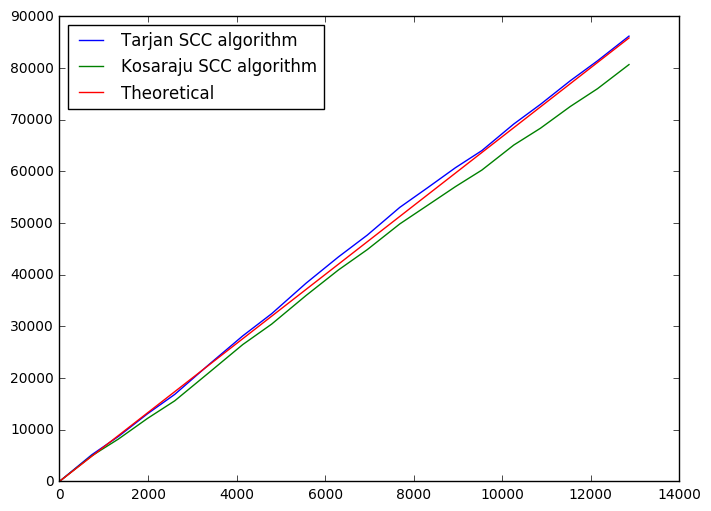

In [568]:
C = sum(kosaraju_results.iloc[:,7]) / float(len(kosaraju_results.iloc[:,7]))
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(tarjan_results.iloc[:,0], tarjan_results.iloc[:,5], label='Tarjan SCC algorithm')
plt.plot(kosaraju_results.iloc[:,0], kosaraju_results.iloc[:,5], label='Kosaraju SCC algorithm')
plt.plot(tarjan_results.iloc[:,0], tarjan_results.iloc[:,0] / C, label='Theoretical')
plt.legend(loc='upper left')
plt.show()

## Graphs. Problem 4. Topological Ordering

### Kahn's algorithm

Kahn's algorithm works by choosing vertices in the same order as the eventual topological sort. First, find a list of "start vertices" which have no incoming edges and insert them into a set, at least one such node must exist in a non-empty acyclic graph. Then for each neighbor with an edge from "start vertex" to the neighbor remove edge from the graph, acquiring new "start verices".[3]

Time complexity of this algorithm is O(|V| + |E|), where V - set of vertices, E - set of edges.

In [535]:
from collections import defaultdict

def toposort_kahn(graph, counters=None):
    in_degree = defaultdict(int)

    # Traverse adjacency lists to fill indegrees of vertices
    for vertex in graph.vertices():
        for neighbor in graph.neighbors(vertex):
            in_degree[neighbor] += 1
            counters.overhead += 2
        counters.overhead += 1

    # Add all vertices with indegree 0 to the set
    starting_vertices = set()
    for vertex in graph.vertices():
        counters.comparisons += 1
        if in_degree[vertex] == 0:
            starting_vertices.add(vertex)
            counters.overhead += 1
        counters.overhead += 1

    sorted_list = []
    while len(starting_vertices) != 0:
        # Starting from vertice with indegree 0
        vertex = starting_vertices.pop()
        sorted_list.append(vertex)
        counters.overhead += 3
        
        # For each neighbor with an edge from starting vertex to the neighbor
        # remove edge from the graph
        for neighbor in graph.neighbors(vertex):
            graph.remove_edge(vertex, neighbor)
            in_degree[neighbor] -= 1
            counters.overhead += 2
            
            # Check if neighbor has no other incoming edges, add it into starting set
            counters.comparisons += 1
            if in_degree[neighbor] == 0:
                starting_vertices.add(neighbor)
                counters.overhead += 1
                
            counters.overhead += 1
    
    counters.comparisons += 1
    if graph.edge_num() != 0:
        raise Exception("graph has at least one cycle")
    
    return sorted_list

### Topological sorting with the Depth First Search

Alternative algorithm for topological sorting is based on depth-first search. The algorithm loops through each node of the graph, in an arbitrary order, initiating a depth-first search that terminates when it hits any node that has already been visited since the beginning of the topological sort or the node has no outgoing edges. [4]

Time complexity of this algorithm is linear O(|V| + |E|).

In [536]:
def explore(graph, vertex, visited, cycle_markers, stack, drop_edge=False, counters=None):
    cycle_markers.add(vertex)
    counters.overhead += 1

    # Recursively visit all neighbors
    for neighbor in graph.neighbors(vertex):
        counters.comparisons += 1
        if neighbor not in visited:
            counters.comparisons += 1
            if neighbor in cycle_markers and not drop_edge:
                raise Exception("graph has at least one cycle. It's not a DAG!")
            elif neighbor in cycle_markers and drop_edge:
                counters.comparisons += 1
                # Needed for DAG generation purposes only
                graph.remove_edge(vertex, neighbor)
                counters.overhead += 1
                continue
            explore(graph, 
                    neighbor, 
                    visited, 
                    cycle_markers, 
                    stack, 
                    drop_edge, 
                    counters)
        
        counters.overhead += 1

    # Record visit
    visited.add(vertex)
    cycle_markers.remove(vertex)
    stack.append(vertex) 
    counters.overhead += 3

def toposort_DFS(graph, counters=None):
    sorted_list = []
    visited = set()
    cycle_markers = set()
     
    for vertex in graph.vertices():
        counters.comparisons += 1
        if vertex not in visited:
            explore(graph, 
                    vertex, 
                    visited, 
                    cycle_markers, 
                    sorted_list, 
                    drop_edge=False, 
                    counters=counters)
        
        counters.overhead += 1
    
    return sorted_list[::-1]

### Experiments

####  DAG generation

To generate the data we use the following process:
- create a completed graph of desired size
- randomly shuffle vertices of the graph's adjacency list
- for each vertex on in list run DFS
- cut the edge of the graph where DFS has found a cycle

This method guarantees that we obtain a random DAG.

In [555]:
import random
random.seed(42)

def DFS(graph, vertex, visited, cycle_markers):
    cycle_markers.add(vertex)

    for neighbor in graph.neighbors(vertex):
        if neighbor not in visited:
            if neighbor in cycle_markers:
                graph.remove_edge(vertex, neighbor)
                continue
            DFS(graph, neighbor, visited, cycle_markers)

    visited.add(vertex)
    cycle_markers.remove(vertex)

# Creates a complete graph and removes edges where cycle 
# was detected by DFS.
def generate_dag(n):  
    visited = set()
    cycle_markers = set()
    edges = [(outbound, inbound) for outbound in range(n) for inbound in range(n)]
    graph = Graph(range(n), edges)
    vertices = graph.vertices()
    random.shuffle(vertices)

    for vertex in vertices:
        if vertex not in visited:
            DFS(graph, vertex, visited, cycle_markers)

    return graph

def test(run_func, vertice_num , step, repeat):
    columns = ['N', 'Time', 'Comparisons', 'Exchanges', 'Overhead', 'Total Ops', 'ACE', 'SF']
    result = []

    for l in range(1, vertice_num, step):
        counters = Counters()
        for _ in range(repeat):
            graph = generate_dag(l)
            N = graph.vertex_num() + graph.edge_num()
            start = time()
            run_func(graph, counters)
            end = time()
            counters.time += (end - start)
            
        result.append([N, 
                       counters.time / float(repeat), 
                       counters.comparisons / float(repeat), 
                       counters.exchanges / float(repeat), 
                       counters.overhead / float(repeat), 
                       counters.total_ops() / float(repeat), 
                       N,
                       N / (counters.total_ops() / float(repeat))])
    
    df = DataFrame(result, columns=columns)
    return df

#### Run Kahn's algorithm experiments

In [565]:
vertice_num = 1000
step = vertice_num / 20
repeat = 5

kahn_result = test(toposort_kahn, vertice_num, step, repeat)
kahn_result

,N,Time,Comparisons,Exchanges,Overhead,Total Ops,ACE,SF
0,1,0.000011,2.0,0.0,6.0,8.0,1,0.125000
1,1326,0.002461,1327.0,0.0,6681.0,8008.0,1326,0.165584
2,5151,0.006496,5152.0,0.0,25856.0,31008.0,5151,0.166118
3,11476,0.013337,11477.0,0.0,57531.0,69008.0,11476,0.166300
4,20301,0.024175,20302.0,0.0,101706.0,122008.0,20301,0.166391
5,31626,0.037871,31627.0,0.0,158381.0,190008.0,31626,0.166446
6,45451,0.065591,45452.0,0.0,227556.0,273008.0,45451,0.166482
7,61776,0.087785,61777.0,0.0,309231.0,371008.0,61776,0.166509
8,80601,0.101722,80602.0,0.0,403406.0,484008.0,80601,0.166528
9,101926,0.135170,101927.0,0.0,510081.0,612008.0,101926,0.166544


#### Run DFS algorithm experiments

In [566]:
DFS_result = test(toposort_DFS, vertice_num, step, repeat)
DFS_result

,N,Time,Comparisons,Exchanges,Overhead,Total Ops,ACE,SF
0,1,0.000008,1.0,0.0,5.0,6.0,1,0.166667
1,1326,0.000626,1375.0,0.0,1530.0,2905.0,1326,0.456454
2,5151,0.001749,5250.0,0.0,5555.0,10805.0,5151,0.476724
3,11476,0.003300,11625.0,0.0,12080.0,23705.0,11476,0.484117
4,20301,0.005615,20500.0,0.0,21105.0,41605.0,20301,0.487946
5,31626,0.008389,31875.0,0.0,32630.0,64505.0,31626,0.490288
6,45451,0.011969,45750.0,0.0,46655.0,92405.0,45451,0.491867
7,61776,0.024857,62125.0,0.0,63180.0,125305.0,61776,0.493005
8,80601,0.026946,81000.0,0.0,82205.0,163205.0,80601,0.493864
9,101926,0.033418,102375.0,0.0,103730.0,206105.0,101926,0.494534


#### Kahn's vs DFS algorithm

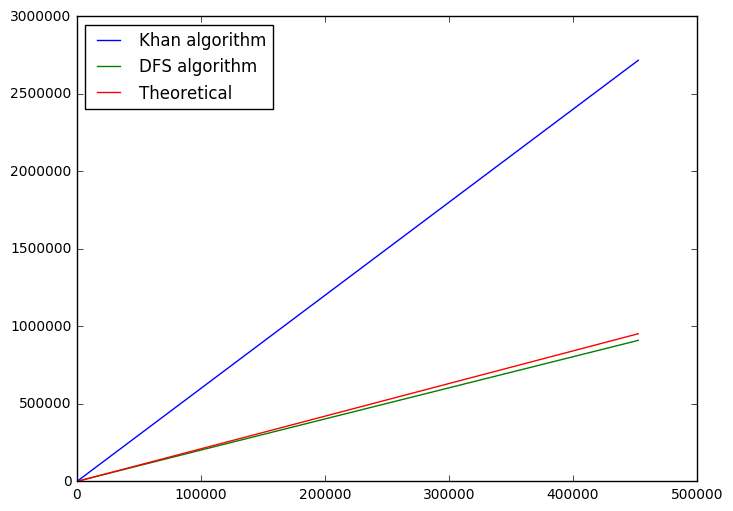

In [567]:
C = sum(DFS_result.iloc[:,7]) / float(len(DFS_result.iloc[:,7]))
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(kahn_result.iloc[:,0], kahn_result.iloc[:,5], label='Khan algorithm')
plt.plot(DFS_result.iloc[:,0], DFS_result.iloc[:,5], label='DFS algorithm')
plt.plot(DFS_result.iloc[:,0], DFS_result.iloc[:,0] / C, label='Theoretical')
plt.legend(loc='upper left')
plt.show()

## Conclusions

As could be seen from the diagrams, the Straight Two-Way Merge Sort is slightly faster than Natural Two-Way Merge Sort. As was expected, based on the elapsed time, Straight Two-Way Merge Sort slightly outperforms Natural Two-Way Merge Sort for integers and strings as well.

For the graph's problem 2, it seems like both Kosaraju's and Tarjan's algorithms are pretty much equal. Both algorithms are linear in time complexity with the approximately same scale factor.  

However, a different picture we see in the problem 4. Both, DFS and Kahn's algorithms are linear in time complexity, but DFS outperforms Kahn's algorithm by the scale factor of 3.

## References

1. Knuth, D. E.: The art of Computer Programming. Volume 3: Sorting and Searching. Addison–Wesley (1998). Section "5.2.4. Sorting by Merging", pp. 160-164).
2. Guido van Rossum (1998). "Python Patterns — Implementing Graphs".
3. Thomas H. Cormen, Charles E. Leiserson, Ronald L. Rivest, and Clifford Stein. Introduction to Algorithms, Second Edition. MIT Press and McGraw-Hill, 2001. ISBN 0-262-03293-7. Section 22.5, pp. 552–557.
4. https://en.wikipedia.org/wiki/Topological_sorting